# Support Vector Machine (SVM)

## SVM | Kernels | Random Forest Comparison

This challenge explains SVM classifier that finds maximum hyperplane margin and soft margin SVM.
* Chosen dataset has to do with the diabetes classification.
* I am going to use the scikit-learn diabetes dataset.
* Analyzing it with different kernels, linear, polynomial and rbf performances.

SVM is a supervised learning algorithm used for task as classification or
regression.

o Binary Classifier.

o Finds the maximum margin between classes and defines boundaries.

o Different kernel presentation: Linear, RBF, Polynomial.

o In our diabetes dataset, SVM creates a boundary about high and low risk of
patients based on important health features.

o Diabetes Dataset shape: (442 samples,10 features, 1 target)

o Our target is classes: Low risk (0) | High risk (1)

__Load Important Libraries__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

__Load Diabetes Data__

In [4]:
from sklearn.datasets import load_diabetes

# Diabetes Dataset
diabetes_sklearn=load_diabetes()

diabetes_df=pd.DataFrame(data=diabetes_sklearn.data, columns=diabetes_sklearn.feature_names)

diabetes_df['target']=diabetes_sklearn.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
diabetes_df.shape

(442, 11)

In [6]:
# Renamed Dataset
diabetes_df.rename(columns={
    "s1": "Total Serum Cholesterol",
    "s2": "Low-Density Lipoprotein Cholesterol",
    "s3": "High-Density Lipoprotein Cholesterol",
    "s4": "Total Cholesterol / HDL Ratio",
    "s5": "Serum Triglycerides",
    "s6": "Blood Sugar Level"
}, inplace=True)

# Display updated dataframe
diabetes_df.head()

,age,sex,bmi,bp,Total Serum Cholesterol,Low-Density Lipoprotein Cholesterol,High-Density Lipoprotein Cholesterol,Total Cholesterol / HDL Ratio,Serum Triglycerides,Blood Sugar Level,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


__SVM Classification__

SVM model applied in different kernels (linear, rbf, polynomial, sigmoid) to
observe their performance.

o Rbf kernel as best performance according to average validation accuracy.

o Accuracy: 0.80, very well performance for both predicted and actual cases.

o Confusion Matrix: shows that the model had 72 low cases, while 20 of them where misclassified as high risk. And for the high cases, 7 predictions, where misclassified as low from the 61 cases high cases.

o SVM classifier compared with Random Forest classifier.

o Very good Accuracy for both models. SVM:0,79 and RF:0,75.

o SVM captures better decision boundaries from Random Forest model, that’s
why it has higher accuracy.

o SVM kernel comparison showed that rbf has the best performance with a
good accuracy 0,80.

Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        49
           1       0.76      0.78      0.77        40

    accuracy                           0.79        89
   macro avg       0.78      0.79      0.78        89
weighted avg       0.79      0.79      0.79        89



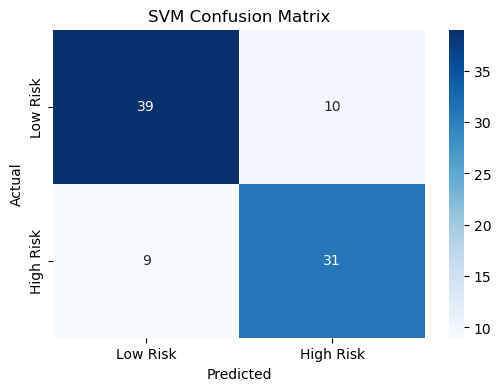

SVM Accuracy: 0.7865
Logistic Regression Accuracy: 0.7303


C:\Users\User\AppData\Local\Temp\ipykernel_8476\3768062301.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


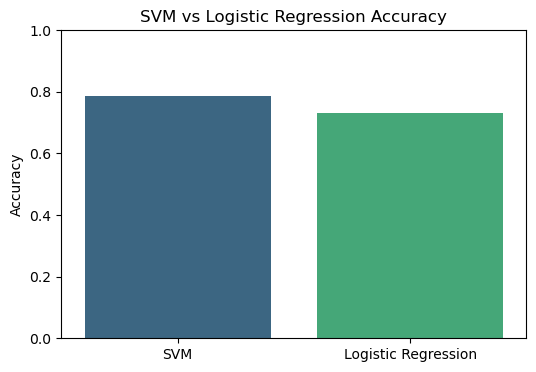

In [20]:
# Features and Target
X=diabetes_df.drop('target', axis=1)
y=diabetes_df['target']

# Classify Dataset Regression to Classification
# Low risk class (0)
# High risk class (1)

y=(y> y.median()).astype(int)

# Data Normalization
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# Train and Test (80%-20%)
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Train with Hyperparameter tuning
param_grid={'C':[0.01, 0.1, 1, 10, 100],
            'kernel':['linear', 'rbf', 'poly', 'sigmoid'],
            'gamma': [0.001, 0.01, 0.1, 1, 'scale', 'auto']}
svm=SVC()
grid_search=GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_
print(f"Best SVM Parameters: {grid_search.best_params_}")

# SVM evalation
y_pred_svm = best_svm.predict(X_test)

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues", xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

# Logistic Regression Train
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Visualization - Accuracy Comparison
models = ["SVM", "Logistic Regression"]
accuracies = [accuracy_svm, accuracy_lr]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.ylabel("Accuracy")
plt.title("SVM vs Logistic Regression Accuracy")
plt.ylim(0, 1)
plt.show()

__SVM-RandomForest__

Best SVM Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79        72
           1       0.73      0.89      0.80        61

    accuracy                           0.80       133
   macro avg       0.81      0.80      0.80       133
weighted avg       0.81      0.80      0.80       133



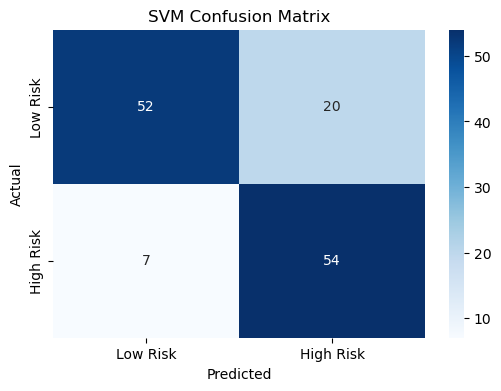

SVM Accuracy: 0.7865

Random Forest Accuracy: 0.7519


C:\Users\User\AppData\Local\Temp\ipykernel_8476\302553767.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


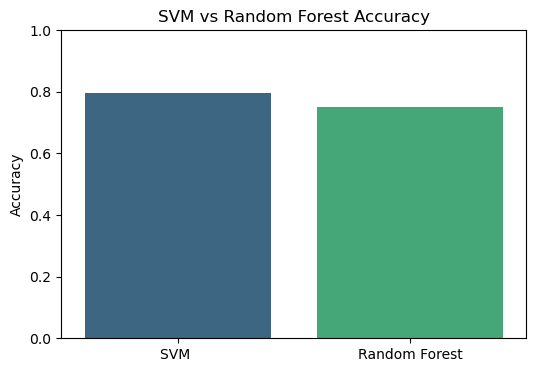

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.datasets import load_diabetes

# Diabetes Dataset
diabetes_sklearn = load_diabetes()
diabetes_df = pd.DataFrame(data=diabetes_sklearn.data, columns=diabetes_sklearn.feature_names)
diabetes_df['target'] = diabetes_sklearn.target

# Regression to Classification
# Low risk class (0)
# High risk class (1)

y = (diabetes_df["target"] > diabetes_df["target"].median()).astype(int)  
X = diabetes_df.drop("target", axis=1) 

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test(70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# PCA for Feature Reduction 
pca = PCA(n_components=5)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM with Hyperparameter Tuning
param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  
    "kernel": ["linear", "rbf", "poly", "sigmoid"],  
    "gamma": [0.001, 0.01, 0.1, 1, "scale", "auto"]
}

svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_pca, y_train)

# Best Model GridSearch
best_svm = grid_search.best_estimator_
print(f"Best SVM Parameters: {grid_search.best_params_}")

# SVM evaluation
y_pred_svm = best_svm.predict(X_test_pca)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print("\nSVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues", xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

# Random Forest Train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  
y_pred_rf = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"\nRandom Forest Accuracy: {rf_accuracy:.4f}")

# Model Accuracies
models = ["SVM ", "Random Forest"]
accuracies = [svm_accuracy, rf_accuracy]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.ylabel("Accuracy")
plt.title("SVM vs Random Forest Accuracy")
plt.ylim(0.0, 1)
plt.show()


 SVM Kernel: linear
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        72
           1       0.74      0.75      0.75        61

    accuracy                           0.77       133
   macro avg       0.77      0.77      0.77       133
weighted avg       0.77      0.77      0.77       133



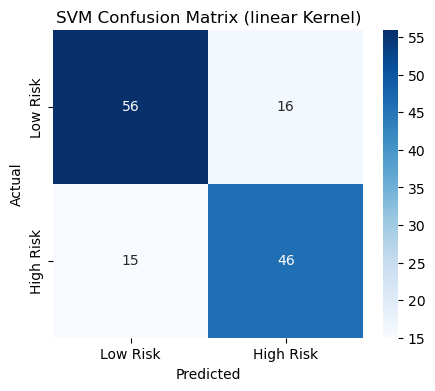


 SVM Kernel: rbf
              precision    recall  f1-score   support

           0       0.88      0.69      0.78        72
           1       0.71      0.89      0.79        61

    accuracy                           0.78       133
   macro avg       0.79      0.79      0.78       133
weighted avg       0.80      0.78      0.78       133



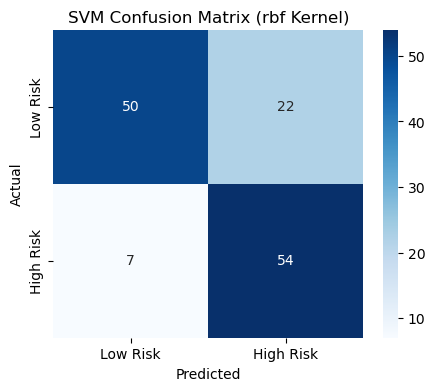


 SVM Kernel: poly
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        72
           1       0.70      0.75      0.72        61

    accuracy                           0.74       133
   macro avg       0.74      0.74      0.74       133
weighted avg       0.74      0.74      0.74       133



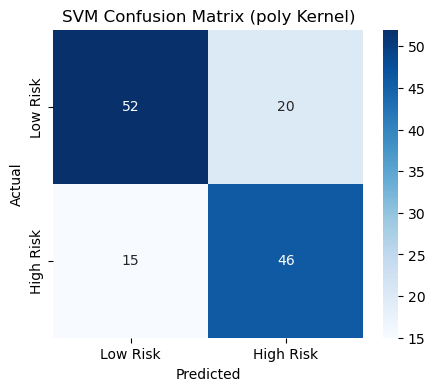


 SVM Kernel: sigmoid
              precision    recall  f1-score   support

           0       0.72      0.60      0.65        72
           1       0.60      0.72      0.66        61

    accuracy                           0.65       133
   macro avg       0.66      0.66      0.65       133
weighted avg       0.66      0.65      0.65       133



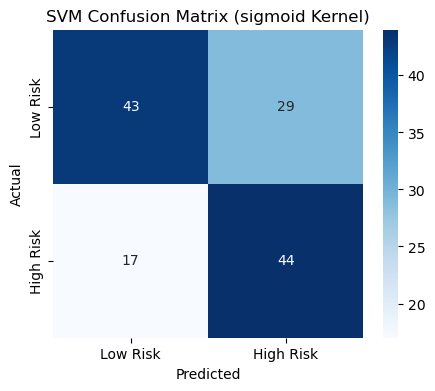

C:\Users\User\AppData\Local\Temp\ipykernel_8476\1512078585.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(kernel_accuracies.keys()), y=list(kernel_accuracies.values()), palette="magma")


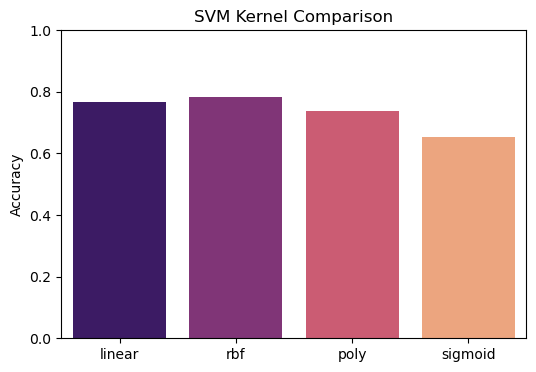

In [30]:
# Kernels to compare the performance 
kernels = ["linear", "rbf", "poly", "sigmoid"]
kernel_accuracies = {}

for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train_pca, y_train) 
    y_pred = svm.predict(X_test_pca)  
    acc = accuracy_score(y_test, y_pred)  
    kernel_accuracies[kernel] = acc  
    
    print(f"\n SVM Kernel: {kernel}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
                xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"SVM Confusion Matrix ({kernel} Kernel)")
    plt.show()

# Compare Kernel Performance
plt.figure(figsize=(6, 4))
sns.barplot(x=list(kernel_accuracies.keys()), y=list(kernel_accuracies.values()), palette="magma")
plt.ylabel("Accuracy")
plt.title("SVM Kernel Comparison")
plt.ylim(0.0, 1)
plt.show()


__Explaining Work__

o Higher amount of diabetes distribution for the Low risk cases, than Higher ones.

o Top two important features for further SVM classification and geometrical margin.

o Feature 1: BMI, body mase index.

o Feature 2: Serum Triglycerides, s5

__Visuals__

C:\Users\User\AppData\Local\Temp\ipykernel_8476\1588279618.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=["blue", "red"])


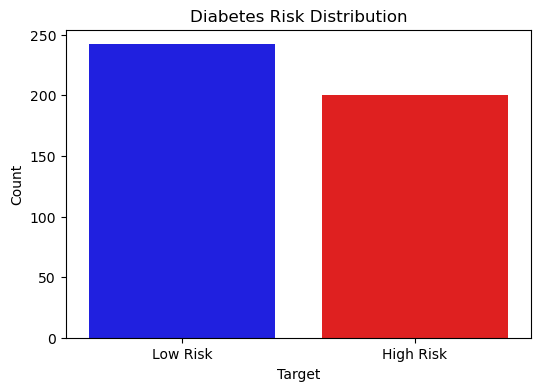

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes

# Dataset
diabetes = load_diabetes()

# Binary classification and Risk threshold for a natural imbalance class
threshold = 150  
y = (diabetes.target > threshold).astype(int) 

# Target Distribution (Low-High Risk)
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette=["blue", "red"])

# Display
plt.xticks([0, 1], ["Low Risk", "High Risk"])
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Diabetes Risk Distribution")
plt.show()

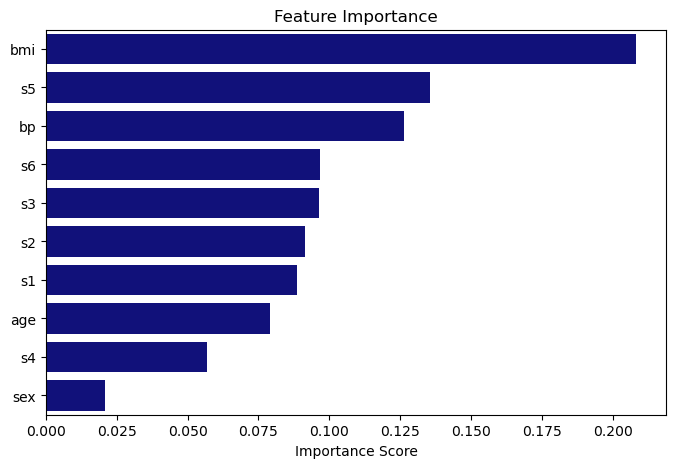

In [79]:
# Feature Importance 
feature_importances = rf.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances[sorted_idx], y=np.array(diabetes_sklearn.feature_names)[sorted_idx], color="darkblue")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()

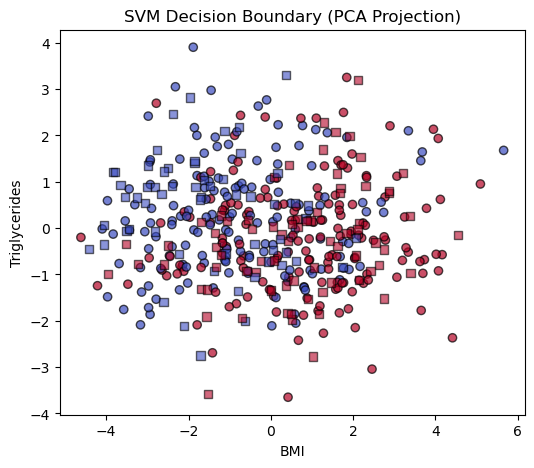

In [67]:
#SVM Decision Boundary in 2D PCA Space
plt.figure(figsize=(6, 5))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="coolwarm", edgecolors="k", alpha=0.7)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_svm, cmap="coolwarm", marker="s", edgecolors="k", alpha=0.6)
plt.title("SVM Decision Boundary (PCA Projection)")
plt.xlabel("BMI")
plt.ylabel("Triglycerides")
plt.show()

__SVM Sigmoid Diagram__

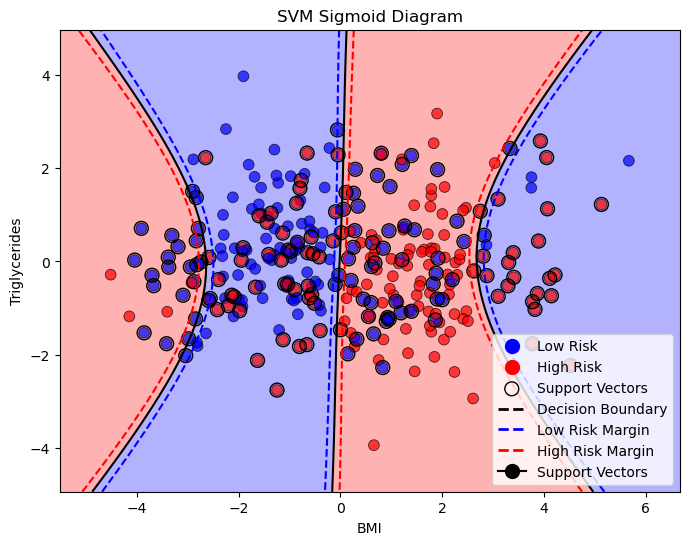

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Dataset
diabetes = load_diabetes()
X = diabetes.data
y = (diabetes.target > np.median(diabetes.target)).astype(int)  # Convert to classification (0 = Low Risk, 1 = High Risk)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for 2D 
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train-test(70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# SVM model
svm = SVC(kernel="linear", C=1)
svm.fit(X_train, y_train)

# Mesh grid for decision boundary 
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict class labels for the mesh grid
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Decision boundary and margins
plt.figure(figsize=(8, 6))
contour = plt.contourf(xx, yy, Z, levels=[Z.min(), 0, Z.max()], alpha=0.3, colors=["blue", "red"]) 
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=["blue", "black", "red"], linestyles=["dashed", "solid", "dashed"])

# Data points
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette=["blue", "red"], edgecolor="k", alpha=0.7, s=60)

# Highlight Support Vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, facecolors="none", edgecolors="black", label="Support Vectors")

# Display Results
handles, labels = plt.gca().get_legend_handles_labels()
handles[0] = plt.Line2D([0], [0], marker="o", color="blue", linestyle="", markersize=10, label="Low Risk")
handles[1] = plt.Line2D([0], [0], marker="o", color="red", linestyle="", markersize=10, label="High Risk")

plt.legend(handles=handles + [plt.Line2D([0], [0], color="black", lw=2, linestyle='dashed', label="Decision Boundary"),
                              plt.Line2D([0], [0], color="blue", lw=2, linestyle='dashed', label="Low Risk Margin"),
                              plt.Line2D([0], [0], color="red", lw=2, linestyle='dashed', label="High Risk Margin"),
                              plt.Line2D([0], [0], marker="o", color="black", markersize=10, label="Support Vectors")])


plt.xlabel("BMI")
plt.ylabel("Triglycerides")
plt.title("SVM Linear Diagram")
plt.show()


o Same code implementation for all kernel performances, changing the
SVM model kernel in code for rbf, poly and sigmoid.

o We can observe that rbf has a better performance of separating the
boundaries for the low and high risk areas, like our model predicted. It
identifies the complex patterns very well.

o While it becomes more complex for the other kernels.

o Polynomial is flexible but still struggles to adapt shapes.

o Can’t adapt the patterns, poor performance.

o Linear kernel struggles with complex patterns.

In [5]:
from IPython.display import Image

Image(url="SVM_Diagrams.png", width=1000, height=300)